In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Transformando em DataFrame
dados_vendas = {
    'mes': [
      'Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',  'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'
    ],
    'vendas': [
       2000, 2200, 2300, 2500, 2600, 2700,
       2800, 2900, 3000, 3100, 3200, 3300
    ]
}
df_vendas = pd.DataFrame(dados_vendas)
df_vendas.head()

,mes,vendas
0,Janeiro,2000
1,Fevereiro,2200
2,Março,2300
3,Abril,2500
4,Maio,2600


In [6]:
df_vendas['mes_value'] = range(1, 13)
df_vendas.head()

,mes,vendas,mes_value
0,Janeiro,2000,1
1,Fevereiro,2200,2
2,Março,2300,3
3,Abril,2500,4
4,Maio,2600,5


In [7]:
df_vendas_formated = df_vendas.drop(columns=['mes']).rename(columns={'mes_value': 'mes'})
df_vendas_formated.head()

,vendas,mes
0,2000,1
1,2200,2
2,2300,3
3,2500,4
4,2600,5


<Axes: >

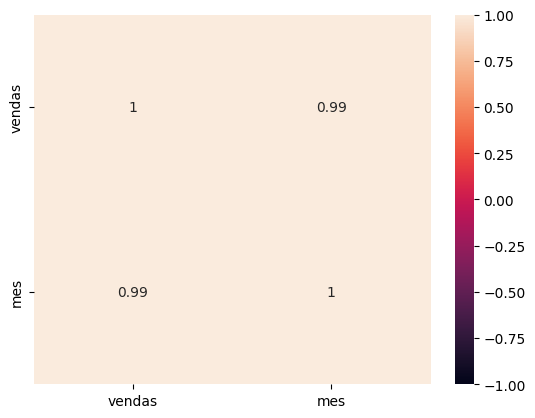

In [8]:
sns.heatmap(df_vendas_formated.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

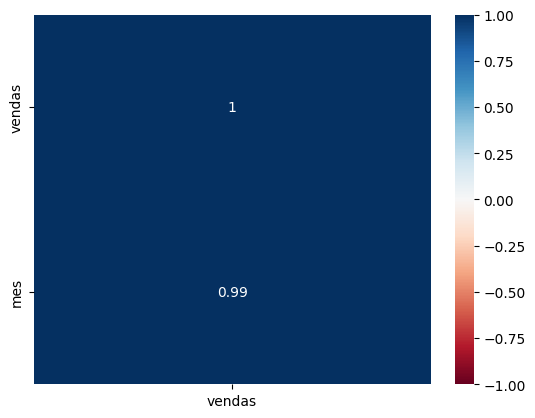

In [12]:
sns.heatmap(df_vendas_formated.corr()[['vendas']].sort_values(by='vendas', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdBu')

array([[<Axes: xlabel='vendas', ylabel='vendas'>,
        <Axes: xlabel='mes', ylabel='vendas'>],
       [<Axes: xlabel='vendas', ylabel='mes'>,
        <Axes: xlabel='mes', ylabel='mes'>]], dtype=object)

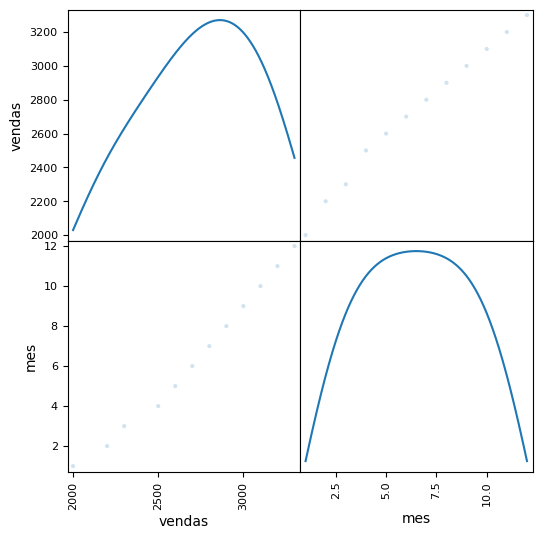

In [13]:
pd.plotting.scatter_matrix(df_vendas_formated, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [ ]:
# Importar bibliotecas do sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [75]:
# Separar dados em treino e teste (deixando apenas dezembro para teste)
X = pd.DataFrame(df_vendas_formated['mes'])
y = df_vendas_formated['vendas']
X_train = X.iloc[:-1]
y_train = y.iloc[:-1]
X_test = X.iloc[-1:]
y_test = y.iloc[-1:].values

In [76]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Valor real de vendas para dezembro: {y_test[0]:.2f}')
print(f'Previsão de vendas para dezembro: {y_pred[0]:.2f}')


Valor real de vendas para dezembro: 3300.00
Previsão de vendas para dezembro: 3356.36


In [86]:
model.score(X_train, y_train)

0.9870869033047736

In [87]:
model.coef_

array([115.45454545])

In [88]:
model.intercept_

np.float64(1970.9090909090905)

In [77]:
mean_absolute_error(y_test, y_pred)

56.36363636363694

In [78]:
# R² não é definido para 1 amostra (variância = 0). Para teste com apenas dezembro, use MAE acima.
if len(y_test) >= 2:
    print(f'R² = {r2_score(y_test, y_pred):.4f}')
else:
    print('R² não se aplica (apenas 1 ponto no teste). Use MAE para avaliar a previsão.')

R² não se aplica (apenas 1 ponto no teste). Use MAE para avaliar a previsão.


array([[<Axes: title={'center': 'vendas'}>,
        <Axes: title={'center': 'mes'}>]], dtype=object)

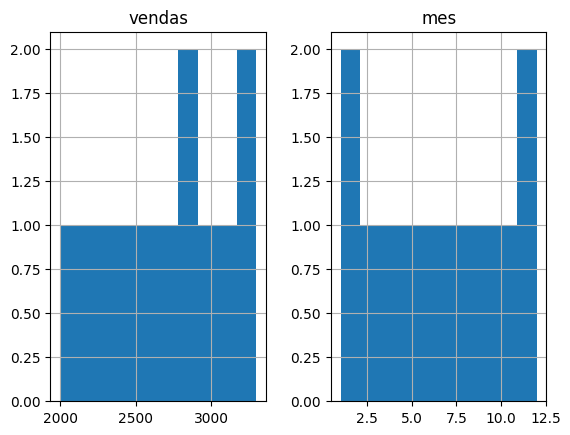

In [79]:
df_vendas_formated.hist()

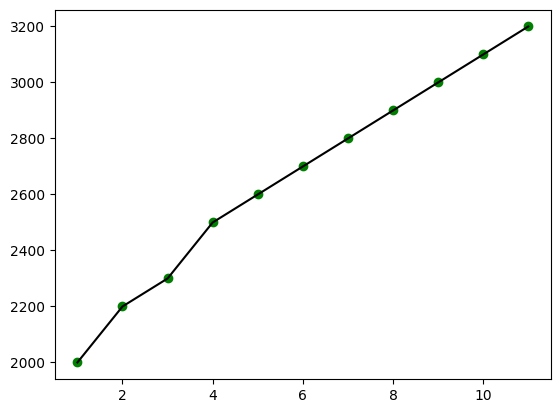

In [85]:
plt.scatter(X_train, y_train, color='g')
plt.plot(X_train, y_train, color='k')

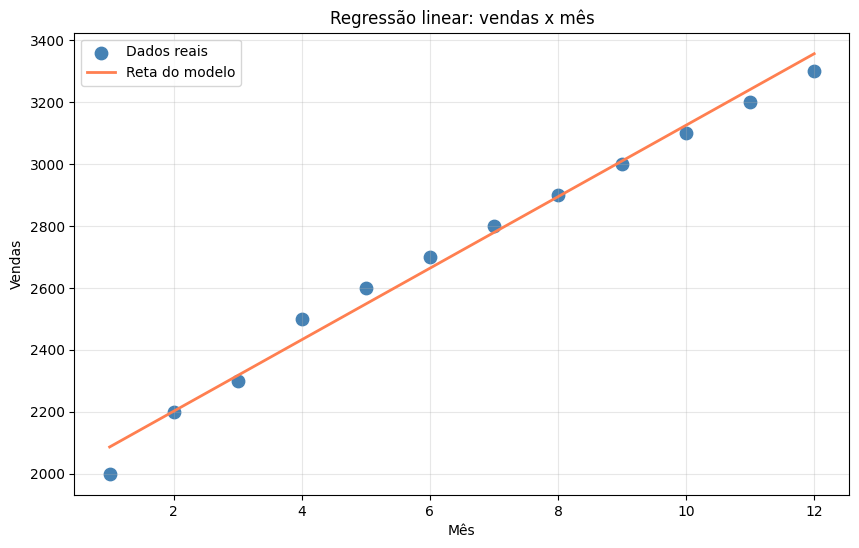

In [91]:
# Desenhar a reta do modelo: pontos reais + reta de regressão
meses = np.linspace(1, 12, 100)  # 100 pontos para a reta ficar suave
vendas_reta = model.predict(pd.DataFrame({'mes': meses}))

plt.figure(figsize=(10, 6))
plt.scatter(df_vendas_formated['mes'], df_vendas_formated['vendas'], label='Dados reais', color='steelblue', s=80)
plt.plot(meses, vendas_reta, color='coral', linewidth=2, label='Reta do modelo')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.title('Regressão linear: vendas x mês')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()